In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
matches = pd.read_csv('matches.csv')

matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
deliveries['ball'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
ball_faced = deliveries.groupby('batter')['ball'].count() 

ball_face_batsman = ball_faced[ball_faced > 100].reset_index().sort_values(by='batter').rename(columns={'ball':'ball_faced'})

ball_face_batsman

,batter,ball_faced
0,A Ashish Reddy,196
1,A Badoni,505
2,A Manohar,181
3,A Mishra,440
4,A Raghuvanshi,109
...,...,...
294,YBK Jaiswal,1095
295,YK Pathan,2334
296,YV Takawale,183
297,Yuvraj Singh,2207


In [9]:
len(ball_face_batsman['batter'].unique())

299

In [10]:
correct_batsmen  = deliveries[deliveries['batter'].isin(ball_face_batsman['batter'])]
correct_batsmen

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [11]:
correct_batsmen.shape

(249886, 17)

In [12]:
correct_batsmen['total_runs'].unique()

array([1, 0, 4, 6, 5, 2, 3, 7])

In [13]:
total_runs = correct_batsmen.groupby('batter')['batsman_runs'].sum().reset_index().sort_values(by='batter')

total_runs

,batter,batsman_runs
0,A Ashish Reddy,280
1,A Badoni,634
2,A Manohar,231
3,A Mishra,381
4,A Raghuvanshi,163
...,...,...
294,YBK Jaiswal,1607
295,YK Pathan,3222
296,YV Takawale,192
297,Yuvraj Singh,2754


In [14]:
batter_out = correct_batsmen[correct_batsmen['is_wicket'] == 1]['batter'].value_counts().reset_index().sort_values(by='batter').rename(columns={'count':'num_times_out'})
batter_out

,batter,num_times_out
196,A Ashish Reddy,15
142,A Badoni,26
205,A Manohar,14
113,A Mishra,31
275,A Raghuvanshi,7
...,...,...
78,YBK Jaiswal,49
24,YK Pathan,111
261,YV Takawale,8
25,Yuvraj Singh,109


In [15]:
merge = ball_face_batsman.merge(total_runs, on='batter', how='inner').merge(batter_out, on='batter', how='inner')
merge

,batter,ball_faced,batsman_runs,num_times_out
0,A Ashish Reddy,196,280,15
1,A Badoni,505,634,26
2,A Manohar,181,231,14
3,A Mishra,440,381,31
4,A Raghuvanshi,109,163,7
...,...,...,...,...
294,YBK Jaiswal,1095,1607,49
295,YK Pathan,2334,3222,111
296,YV Takawale,183,192,8
297,Yuvraj Singh,2207,2754,109


In [17]:
merge['batting_avg'] = merge['batsman_runs'] / merge['num_times_out']
merge['strike_rate'] = (merge['batsman_runs'] / merge['ball_faced']) * 100
#merge['bowling_eco'] = merge['batsman_runs'] / merge['over']

merge

,batter,ball_faced,batsman_runs,num_times_out,batting_avg,strike_rate
0,A Ashish Reddy,196,280,15,18.666667,142.857143
1,A Badoni,505,634,26,24.384615,125.544554
2,A Manohar,181,231,14,16.500000,127.624309
3,A Mishra,440,381,31,12.290323,86.590909
4,A Raghuvanshi,109,163,7,23.285714,149.541284
...,...,...,...,...,...,...
294,YBK Jaiswal,1095,1607,49,32.795918,146.757991
295,YK Pathan,2334,3222,111,29.027027,138.046272
296,YV Takawale,183,192,8,24.000000,104.918033
297,Yuvraj Singh,2207,2754,109,25.266055,124.784776


In [19]:
deliveries['bowler'].value_counts()

bowler
R Ashwin         4679
SP Narine        4146
B Kumar          4060
RA Jadeja        3895
PP Chawla        3895
                 ... 
SN Khan             2
SPD Smith           2
AC Gilchrist        1
YBK Jaiswal         1
Atharva Taide       1
Name: count, Length: 530, dtype: int64

In [20]:
# Calculate overs bowled
overs_bowled = deliveries.groupby('bowler').size() / 6

# Create a dataframe with bowlers and overs bowled
bowler_overs = pd.DataFrame({
    'bowler': overs_bowled.index,
    'over': overs_bowled.values.round(1)  # Round to 1 decimal place
})

# Sort by overs bowled in descending order
bowler_overs = bowler_overs.sort_values('over', ascending=False).reset_index(drop=True)

# Display the top 10 bowlers by overs bowled
print(bowler_overs.head(10))

            bowler   over
0         R Ashwin  779.8
1        SP Narine  691.0
2          B Kumar  676.7
3        PP Chawla  649.2
4        RA Jadeja  649.2
5        YS Chahal  604.7
6  Harbhajan Singh  582.7
7         A Mishra  574.0
8         DJ Bravo  549.3
9         UT Yadav  531.7


In [21]:
len(bowler_overs['bowler'].unique())

530

In [22]:
eligible_df  = deliveries[deliveries['bowler'].isin(bowler_overs['bowler'])]
eligible_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [23]:
eligible_df.shape
eligible_df['total_runs'].unique()

array([1, 0, 4, 6, 5, 2, 3, 7])

In [24]:
total_runs = eligible_df.groupby('bowler')['total_runs'].sum().reset_index().sort_values(by='bowler')
total_runs

,bowler,total_runs
0,A Ashish Reddy,400
1,A Badoni,37
2,A Chandila,245
3,A Choudhary,144
4,A Dananjaya,47
...,...,...
525,Yash Dayal,933
526,Yash Thakur,702
527,Yudhvir Singh,125
528,Yuvraj Singh,1091


In [26]:
merged_df = bowler_overs.merge(total_runs, on='bowler', how='inner')
merged_df['bowling_eco'] = merged_df['total_runs'] / merged_df['over']
merged_df

,bowler,over,total_runs,bowling_eco
0,R Ashwin,779.8,5435,6.969736
1,SP Narine,691.0,4672,6.761216
2,B Kumar,676.7,5051,7.464164
3,PP Chawla,649.2,5179,7.977511
4,RA Jadeja,649.2,4917,7.573937
...,...,...,...,...
525,DA Warner,0.3,2,6.666667
526,SN Khan,0.3,6,20.000000
527,YBK Jaiswal,0.2,6,30.000000
528,Atharva Taide,0.2,4,20.000000


In [27]:
merge

,batter,ball_faced,batsman_runs,num_times_out,batting_avg,strike_rate
0,A Ashish Reddy,196,280,15,18.666667,142.857143
1,A Badoni,505,634,26,24.384615,125.544554
2,A Manohar,181,231,14,16.500000,127.624309
3,A Mishra,440,381,31,12.290323,86.590909
4,A Raghuvanshi,109,163,7,23.285714,149.541284
...,...,...,...,...,...,...
294,YBK Jaiswal,1095,1607,49,32.795918,146.757991
295,YK Pathan,2334,3222,111,29.027027,138.046272
296,YV Takawale,183,192,8,24.000000,104.918033
297,Yuvraj Singh,2207,2754,109,25.266055,124.784776


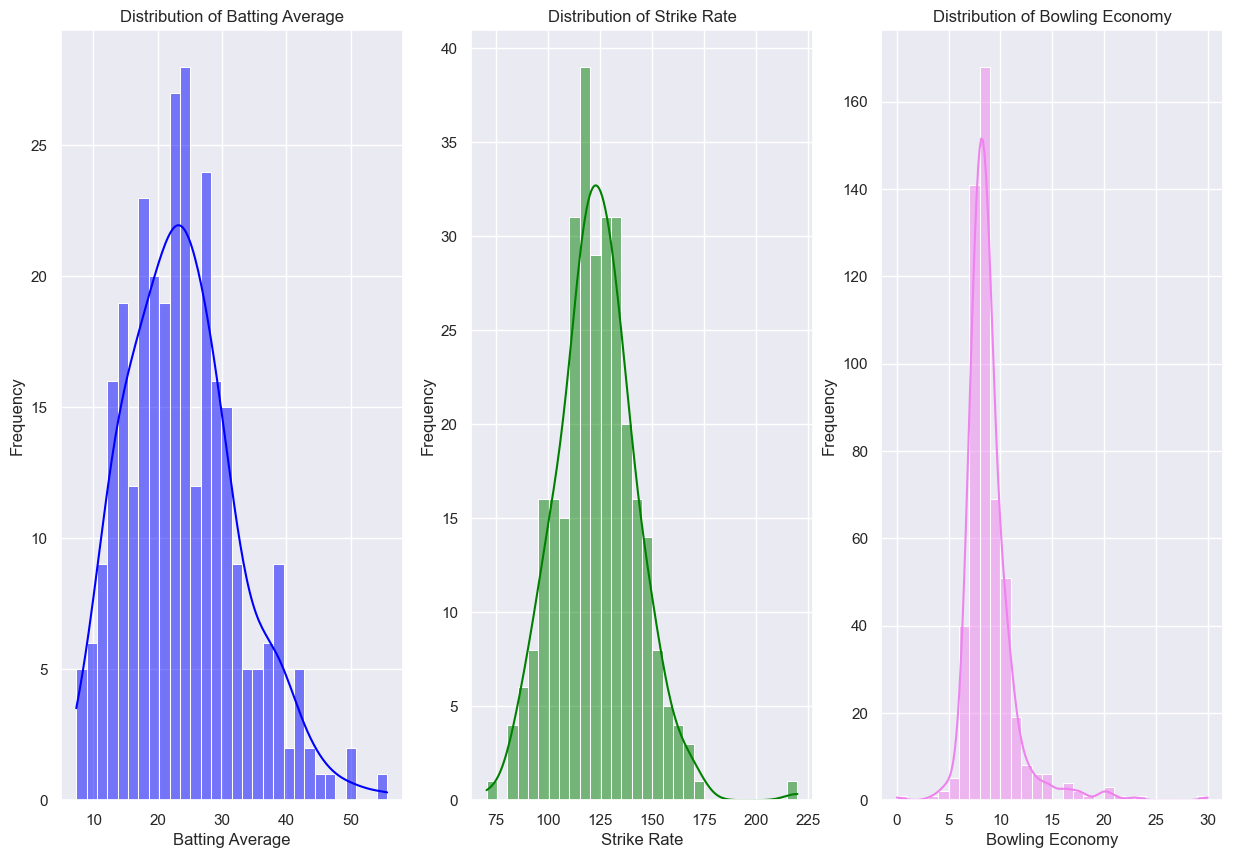

In [30]:
# Set plot style
sns.set_theme(style="darkgrid")

# Create subplots for Batting Average and Strike Rate distributions
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Batting Average Distribution
sns.histplot(data = merge, x = "batting_avg", bins=30, kde=True, ax=ax[0], color="blue")
ax[0].set_title("Distribution of Batting Average")
ax[0].set_xlabel("Batting Average")
ax[0].set_ylabel("Frequency")

# Strike Rate Distribution
sns.histplot(data = merge, x = "strike_rate", bins=30, kde=True, ax=ax[1], color="green")
ax[1].set_title("Distribution of Strike Rate")
ax[1].set_xlabel("Strike Rate")
ax[1].set_ylabel("Frequency")

sns.histplot(data = merged_df, x = "bowling_eco", bins=30, kde=True, ax=ax[2], color="violet")
ax[2].set_title("Distribution of Bowling Economy")
ax[2].set_xlabel("Bowling Economy")
ax[2].set_ylabel("Frequency")

# Show plots
plt.show();

In [32]:

def remove_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply function to remove outliers from batting_avg and strike_rate
filtered_df = remove_outliers(merge, 'batting_avg')
filtered_df = remove_outliers(filtered_df, 'strike_rate')
filtered_df[filtered_df['batting_avg'] > 40]

,batter,ball_faced,batsman_runs,num_times_out,batting_avg,strike_rate
9,AB de Villiers,3487,5181,125,41.448000,148.580442
61,DA Warner,4849,6567,164,40.042683,135.429986
95,HM Amla,418,577,13,44.384615,138.038278
116,JP Duminy,1680,2029,49,41.408163,120.773810
127,KL Rahul,3578,4689,106,44.235849,131.050866
213,RD Gaikwad,1781,2380,56,42.500000,133.632791
279,Tilak Varma,830,1156,28,41.285714,139.277108


In [33]:
X = filtered_df.iloc[:,4:6].values
X;

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transform the data

C:\Users\witby\AppData\Local\Temp\ipykernel_7312\1861002249.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, cmap='viridis')


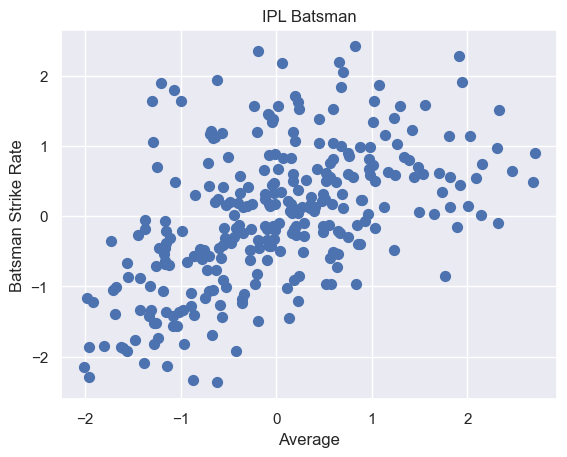

In [36]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, cmap='viridis')
plt.title("IPL Batsman")
plt.xlabel("Average")
plt.ylabel("Batsman Strike Rate")
plt.show()

In [37]:
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

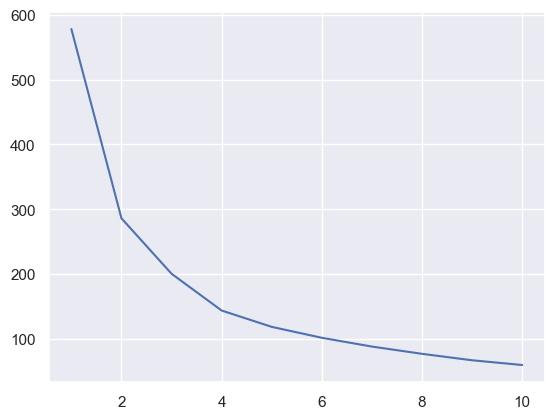

In [38]:
plt.plot(range(1,11),wcss)

Elbow point at n=4

In [39]:
kmeans = KMeans(n_init = 20, n_clusters = 4)
y_kmeans = kmeans.fit_predict(X_scaled)


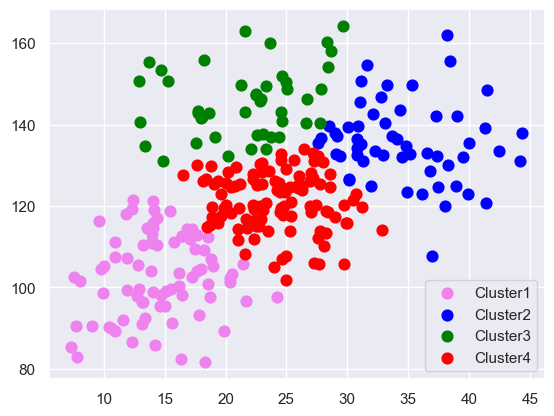

In [40]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'violet', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'red', label = 'Cluster4')

plt.legend()

plt.show()

In [41]:
from sklearn.metrics import silhouette_score

for i in range(2, 11):  # Start from 2 instead of 1
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'For k={i}, Silhouette Score: {score}')

For k=2, Silhouette Score: 0.46964162871855125
For k=3, Silhouette Score: 0.41948374752617984
For k=4, Silhouette Score: 0.3852152541339863
For k=5, Silhouette Score: 0.38118354866647675
For k=6, Silhouette Score: 0.37234223566414354
For k=7, Silhouette Score: 0.3527190723995627
For k=8, Silhouette Score: 0.35013701769164857
For k=9, Silhouette Score: 0.36677279837322996
For k=10, Silhouette Score: 0.3599015390176764


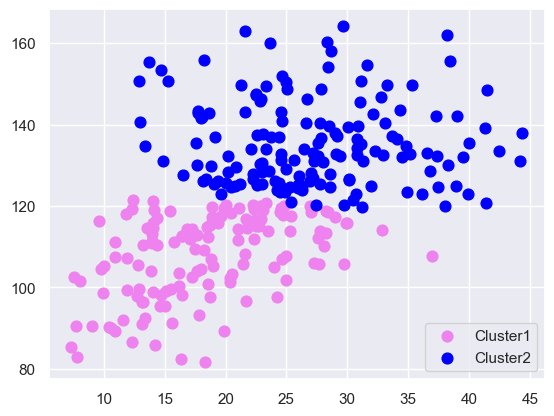

In [42]:
kmeans = KMeans(n_init = 20, n_clusters = 2)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'violet', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.legend()

plt.show()

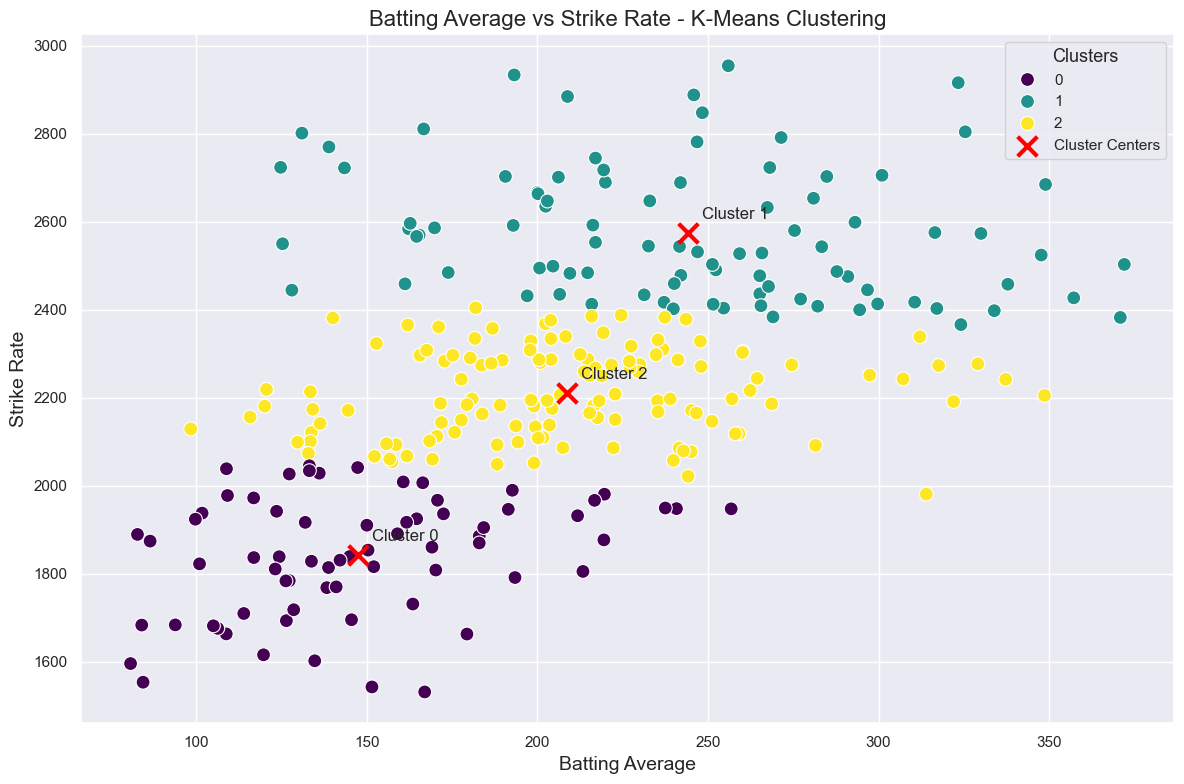

In [46]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Create dataframe with original features and cluster labels
merged_stats = pd.DataFrame(scaler.inverse_transform(X), columns=['batting_avg', 'strike_rate'])
merged_stats['Cluster'] = cluster_labels

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged_stats, 
    x='batting_avg', 
    y='strike_rate', 
    hue='Cluster',  # Use cluster labels for coloring
    palette='viridis', 
    s=100
)

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, linewidths=3, label='Cluster Centers')

plt.title('Batting Average vs Strike Rate - K-Means Clustering', fontsize=16)
plt.xlabel('Batting Average', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.legend(title='Clusters', title_fontsize='13', fontsize='11')

# Annotate cluster centers
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', xy=(center[0], center[1]), 
                 xytext=(10, 10), textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.show()